# This is a simple example of how to load and plot the provided data.

In [1]:
import zarr
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [76]:
# Load the data (update the path to the correct location)
data_path = "processed_data_cse151b_v2_corrupted_ssp245.zarr"
data = xr.open_zarr(data_path)
data

<xarray.Dataset> Size: 621MB
Dimensions:    (ssp: 4, time: 1021, latitude: 48, longitude: 72, x: 72, y: 48,
                member_id: 3)
Coordinates:
    lat        (x, y) float64 28kB dask.array<chunksize=(72, 48), meta=np.ndarray>
  * latitude   (latitude) float64 384B -89.05 -85.26 -81.47 ... 85.26 89.05
    lon        (x, y) float64 28kB dask.array<chunksize=(72, 48), meta=np.ndarray>
  * longitude  (longitude) float64 576B 1.25 6.25 11.25 ... 346.2 351.2 356.2
  * member_id  (member_id) int64 24B 0 1 2
  * ssp        (ssp) <U6 96B 'ssp126' 'ssp245' 'ssp370' 'ssp585'
  * time       (time) object 8kB 2015-01-15 00:00:00 ... 2100-01-15 00:00:00
  * x          (x) float64 576B 1.875 6.875 11.88 16.88 ... 346.9 351.9 356.9
  * y          (y) float64 384B -88.59 -84.82 -81.05 ... 81.05 84.82 88.59
Data variables:
    BC         (ssp, time, latitude, longitude) float64 113MB dask.array<chunksize=(1, 24, 48, 72), meta=np.ndarray>
    CH4        (ssp, time) float64 33kB dask.array<chunksize=(1, 24), meta=np.ndarray>
    CO2        (ssp, time) float64 33kB dask.array<chunksize=(1, 24), meta=np.ndarray>
    SO2        (ssp, time, latitude, longitude) float64 113MB dask.array<chunksize=(1, 24, 48, 72), meta=np.ndarray>
    pr         (ssp, time, member_id, y, x) float32 169MB dask.array<chunksize=(1, 24, 1, 48, 72), meta=np.ndarray>
    rsdt       (ssp, time, y, x) float32 56MB dask.array<chunksize=(1, 24, 48, 72), meta=np.ndarray>
    tas        (ssp, time, member_id, y, x) float32 169MB dask.array<chunksize=(1, 24, 1, 48, 72), meta=np.ndarray>
Attributes:
    original_member_ids:  ['r10i1p1f1', 'r11i1p1f1', 'r4i1p1f1']
    precipitation_units:  mm/day (converted from kg m-2 s-1)
    source:               CMIP6 data processed for CSE151B
    ssp:                  ssp126

In [109]:
(3 * len(training_data.time) - len(validation_data.time))

2943

In [110]:
training_data = data.sel(ssp=['ssp126', 'ssp370', 'ssp585'])
validation_data = data.sel(ssp='ssp370')
validation_data = data.isel(time=slice(-121, -1))
test_data = data.sel(ssp='ssp245')

train_length = (3 * len(training_data.time) - len(validation_data.time)) * len(training_data.member_id) * len(training_data.latitude) * len(training_data.longitude)
test_length = 
print('Training data length: ' + str(train_length))
print('Test data length: ' + str(len(test_data.time)))

Training data length: 30513024
Test data length: 1021


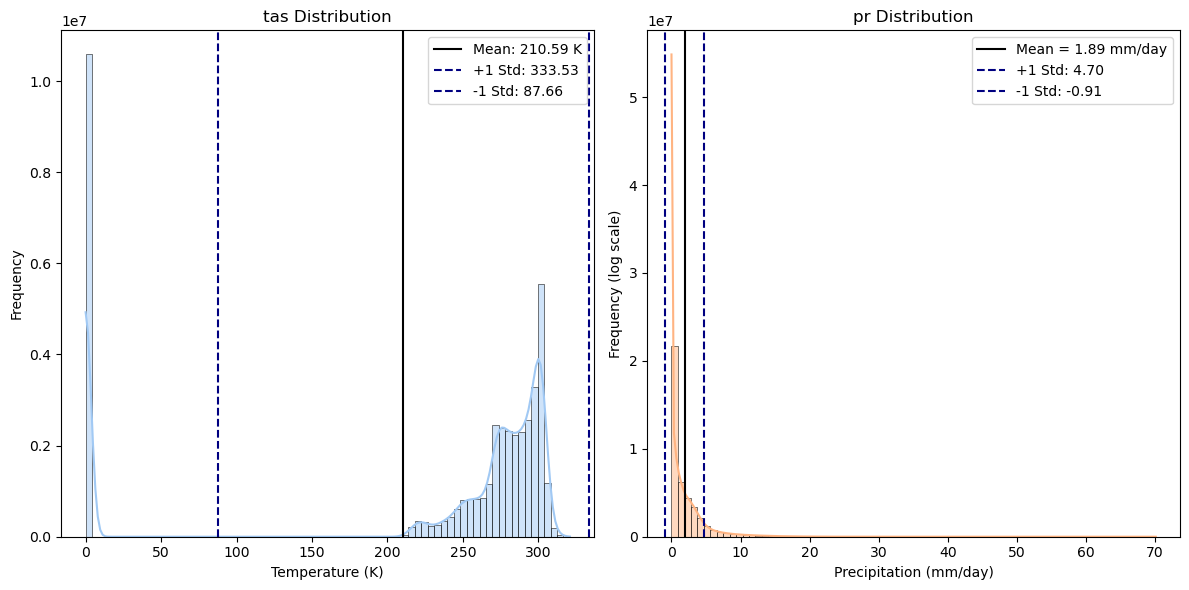

In [5]:
tas = data['tas']
pr = data['pr']

tas_mean = tas.mean(dim=['ssp', 'time', 'member_id', 'y', 'x'], skipna=True).values.item()
tas_std = tas.std(dim=['ssp', 'time', 'member_id', 'y', 'x'], skipna=True).values.item()
tas_flat = tas.values.flatten()
tas_flat = tas_flat[~np.isnan(tas_flat)]

pr_mean = pr.mean(dim=['ssp', 'time', 'member_id', 'y', 'x'], skipna=True).values.item()
pr_std = pr.std(dim=['ssp', 'time', 'member_id', 'y', 'x'], skipna=True).values.item()
pr_flat = pr.values.flatten()
pr_flat = pr_flat[~np.isnan(pr_flat)]

colors = sns.color_palette("pastel", n_colors=2)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(tas_flat, bins=75, kde=True, color=colors[0], edgecolor='k', ax=axes[0])
axes[0].axvline(tas_mean, color='black', linestyle='-', label=f'Mean: {tas_mean:.2f} K')
axes[0].axvline(tas_mean + tas_std, color='navy', linestyle='--', label=f'+1 Std: {tas_mean + tas_std:.2f}')
axes[0].axvline(tas_mean - tas_std, color='navy', linestyle='--', label=f'-1 Std: {tas_mean - tas_std:.2f}')
axes[0].set_title('tas Distribution')
axes[0].set_xlabel('Temperature (K)')
axes[0].set_ylabel('Frequency')
axes[0].legend()

sns.histplot(pr_flat, bins=75, kde=True, color=colors[1], edgecolor='k', ax=axes[1])
axes[1].axvline(pr_mean, color='black', linestyle='-', label=f'Mean = {pr_mean:.2f} mm/day')
axes[1].axvline(pr_mean + pr_std, color='navy', linestyle='--', label=f'+1 Std: {pr_mean + pr_std:.2f}')
axes[1].axvline(pr_mean - pr_std, color='navy', linestyle='--', label=f'-1 Std: {pr_mean - pr_std:.2f}')
axes[1].set_title('pr Distribution')
axes[1].set_xlabel('Precipitation (mm/day)')
axes[1].set_ylabel('Frequency (log scale)')
axes[1].legend()

plt.tight_layout()
plt.show()

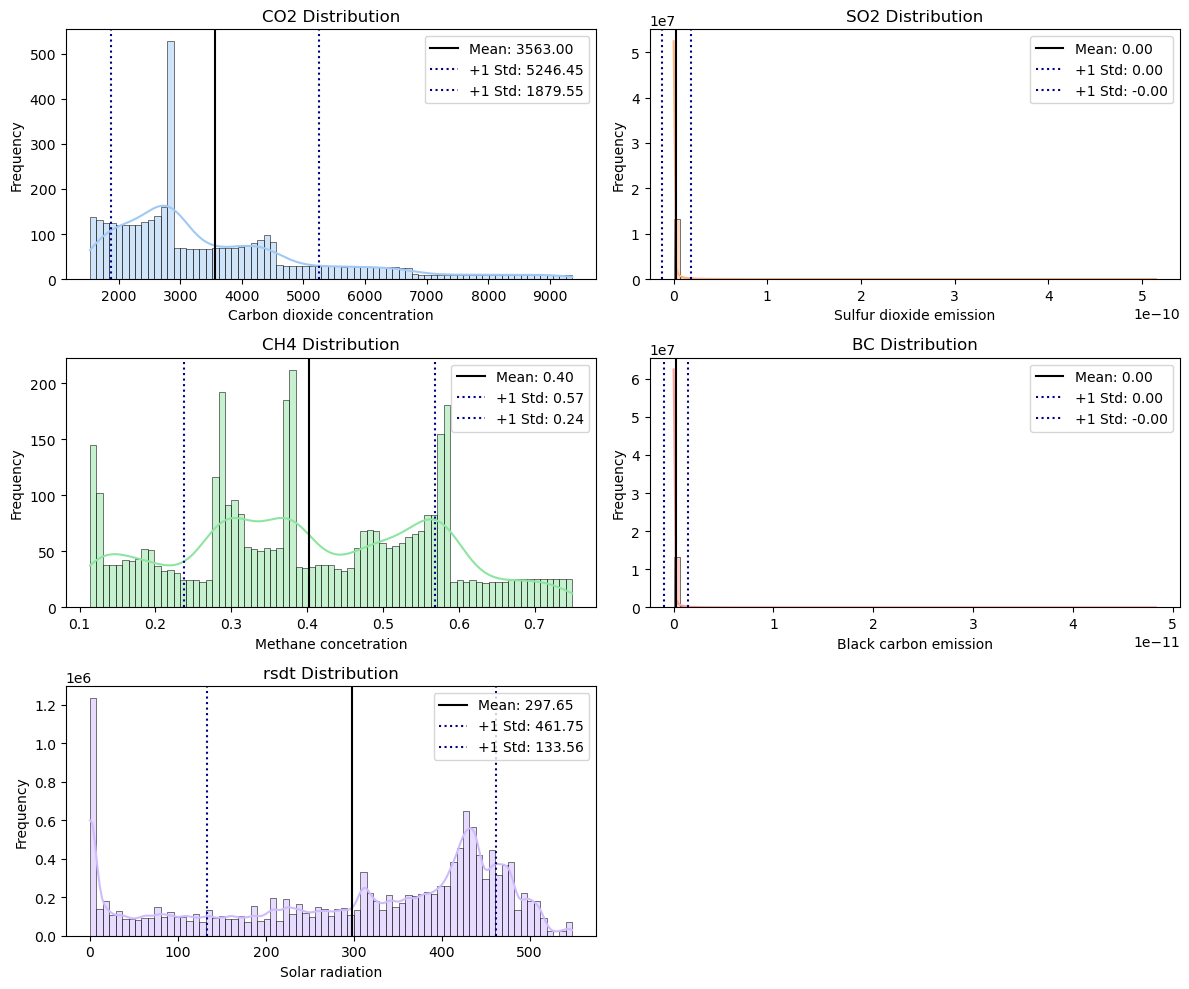

In [59]:
co2 = data['CO2']
so2 = data['SO2']
ch4 = data['CH4']
bc = data['BC']
rsdt = data['rsdt']

co2_mean = co2.mean(dim=['ssp', 'time'], skipna=True).values.item()
co2_std = co2.std(dim=['ssp', 'time'], skipna=True).values.item()
co2_flat = co2.values.flatten()

so2_mean = so2.mean(dim=['ssp', 'time', 'latitude', 'longitude'], skipna=True).values.item()
so2_std = so2.std(dim=['ssp', 'time', 'latitude', 'longitude'], skipna=True).values.item()
so2_flat = so2.values.flatten()

ch4_mean = ch4.mean(dim=['ssp', 'time'], skipna=True).values.item()
ch4_std = ch4.std(dim=['ssp', 'time'], skipna=True).values.item()
ch4_flat = ch4.values.flatten()

bc_mean = bc.mean(dim=['ssp', 'time', 'latitude', 'longitude'], skipna=True).values.item()
bc_std = bc.std(dim=['ssp', 'time', 'latitude', 'longitude'], skipna=True).values.item()
bc_flat = bc.values.flatten()

rsdt_mean = rsdt.mean(dim=['ssp', 'time', 'y', 'x'], skipna=True).values.item()
rsdt_std = rsdt.std(dim=['ssp', 'time', 'y', 'x'], skipna=True).values.item()
rsdt_flat = rsdt.values.flatten()

colors = sns.color_palette('pastel', n_colors=5)
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
axes = axes.flatten()

sns.histplot(co2_flat, bins=75, kde=True, color=colors[0], edgecolor='k', ax=axes[0])
axes[0].axvline(co2_mean, color='black', linestyle='-', label=f'Mean: {co2_mean:.2f}')
axes[0].axvline(co2_mean + co2_std, color='navy', linestyle=':', label=f'+1 Std: {co2_mean + co2_std:.2f}')
axes[0].axvline(co2_mean - co2_std, color='navy', linestyle=':', label=f'+1 Std: {co2_mean - co2_std:.2f}')
axes[0].set_title('CO2 Distribution')
axes[0].set_xlabel('Carbon dioxide concentration')
axes[0].set_ylabel('Frequency')
axes[0].legend()

sns.histplot(so2_flat, bins=75, kde=True, color=colors[1], edgecolor='k', ax=axes[1])
axes[1].axvline(so2_mean, color='black', linestyle='-', label=f'Mean: {so2_mean:.2f}')
axes[1].axvline(so2_mean + so2_std, color='navy', linestyle=':', label=f'+1 Std: {so2_mean + so2_std:.2f}')
axes[1].axvline(so2_mean - so2_std, color='navy', linestyle=':', label=f'+1 Std: {so2_mean - so2_std:.2f}')
axes[1].set_title('SO2 Distribution')
axes[1].set_xlabel('Sulfur dioxide emission')
axes[1].set_ylabel('Frequency')
axes[1].legend()

sns.histplot(ch4_flat, bins=75, kde=True, color=colors[2], edgecolor='k', ax=axes[2])
axes[2].axvline(ch4_mean, color='black', linestyle='-', label=f'Mean: {ch4_mean:.2f}')
axes[2].axvline(ch4_mean + ch4_std, color='navy', linestyle=':', label=f'+1 Std: {ch4_mean + ch4_std:.2f}')
axes[2].axvline(ch4_mean - ch4_std, color='navy', linestyle=':', label=f'+1 Std: {ch4_mean - ch4_std:.2f}')
axes[2].set_title('CH4 Distribution')
axes[2].set_xlabel('Methane concetration')
axes[2].set_ylabel('Frequency')
axes[2].legend()

sns.histplot(bc_flat, bins=75, kde=True, color=colors[3], edgecolor='k', ax=axes[3])
axes[3].axvline(bc_mean, color='black', linestyle='-', label=f'Mean: {bc_mean:.2f}')
axes[3].axvline(bc_mean + bc_std, color='navy', linestyle=':', label=f'+1 Std: {bc_mean + bc_std:.2f}')
axes[3].axvline(bc_mean - bc_std, color='navy', linestyle=':', label=f'+1 Std: {bc_mean - bc_std:.2f}')
axes[3].set_title('BC Distribution')
axes[3].set_xlabel('Black carbon emission')
axes[3].set_ylabel('Frequency')
axes[3].legend()


sns.histplot(rsdt_flat, bins=75, kde=True, color=colors[4], edgecolor='k', ax=axes[4])
axes[4].axvline(rsdt_mean, color='black', linestyle='-', label=f'Mean: {rsdt_mean:.2f}')
axes[4].axvline(rsdt_mean + rsdt_std, color='navy', linestyle=':', label=f'+1 Std: {rsdt_mean + rsdt_std:.2f}')
axes[4].axvline(rsdt_mean - rsdt_std, color='navy', linestyle=':', label=f'+1 Std: {rsdt_mean - rsdt_std:.2f}')
axes[4].set_title('rsdt Distribution')
axes[4].set_xlabel('Solar radiation')
axes[4].set_ylabel('Frequency')
axes[4].legend()

axes[5].axis('off')

plt.tight_layout()
plt.show()

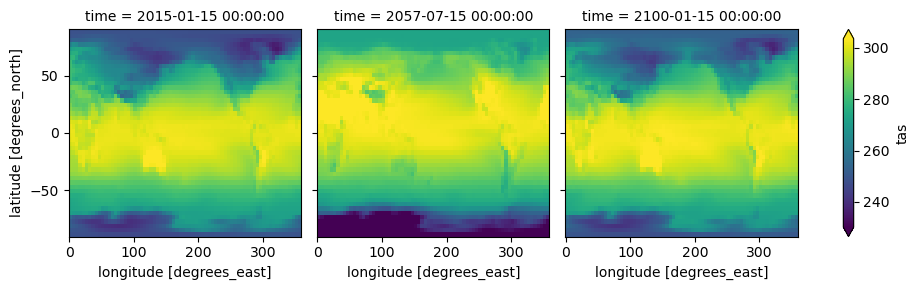

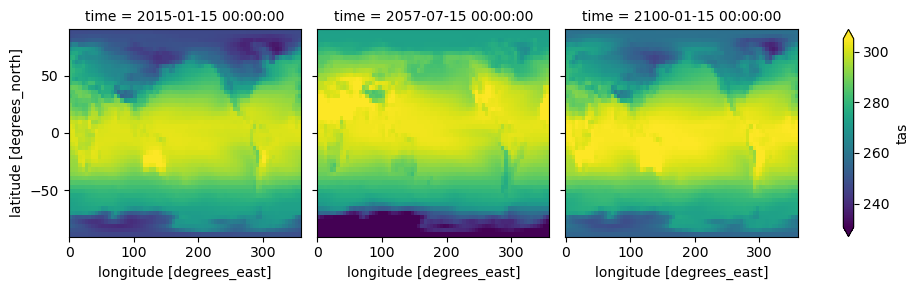

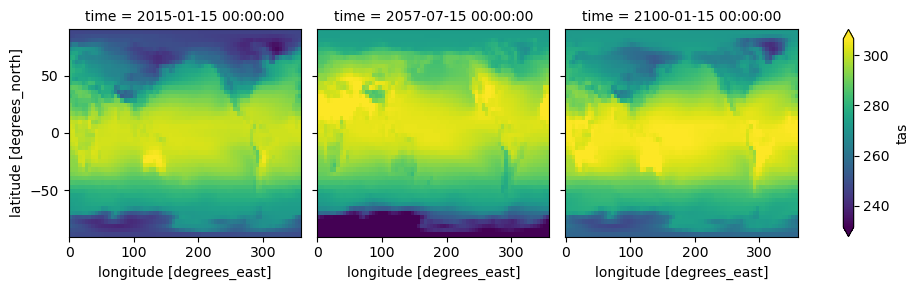

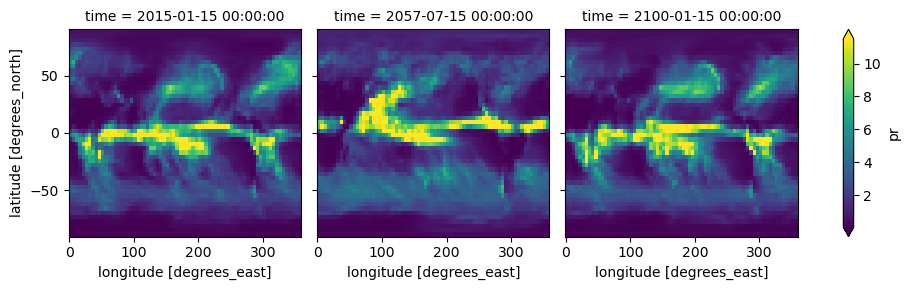

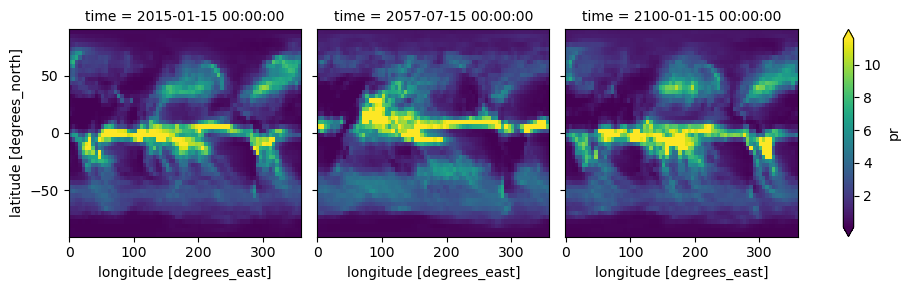

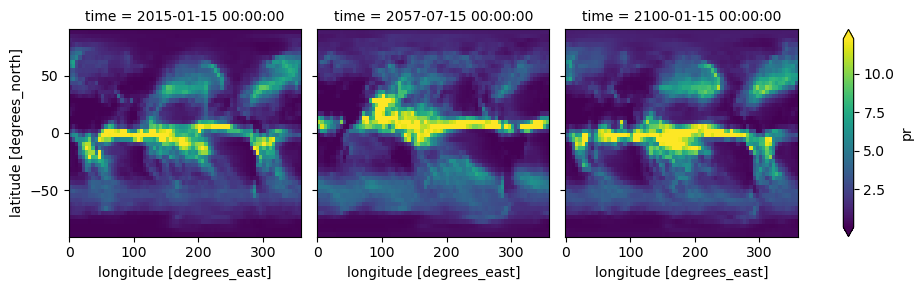

In [58]:
mean_data = data.mean(dim='member_id')

data_ssp126 = mean_data.isel(time=[0, data.time.size // 2, -1]).sel(ssp="ssp126")
# data_ssp245 = mean_data.isel(time=[0, data.time.size // 2, -1]).sel(ssp="ssp245")
data_ssp370 = mean_data.isel(time=[0, data.time.size // 2, -1]).sel(ssp="ssp370")
data_ssp585 = mean_data.isel(time=[0, data.time.size // 2, -1]).sel(ssp="ssp585")

tas_ssp126 = data_ssp126.tas.plot(col="time", x="x", y="y", robust=True)
# data_ssp245.tas.plot(col="time", x="x", y="y", robust=True)
data_ssp370.tas.plot(col="time", x="x", y="y", robust=True)
data_ssp585.tas.plot(col="time", x="x', y="y", robust=True)

pr = data_ssp126.pr.plot(col='time'", x='x', y='y', robust=True)
# data_ssp245.pr.plot(col='time', x='x', y='y', robust=True)
data_ssp370.pr.plot(col='time', x='x', y='y', robust=True)
data_ssp585.pr.plot(col='time', x='x', y="y', robust=True)


## Plot a few snapshots of temperature and precipitation (first, middle, and last)

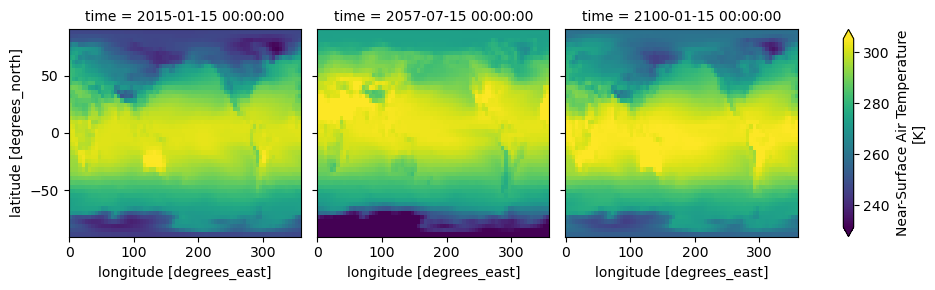

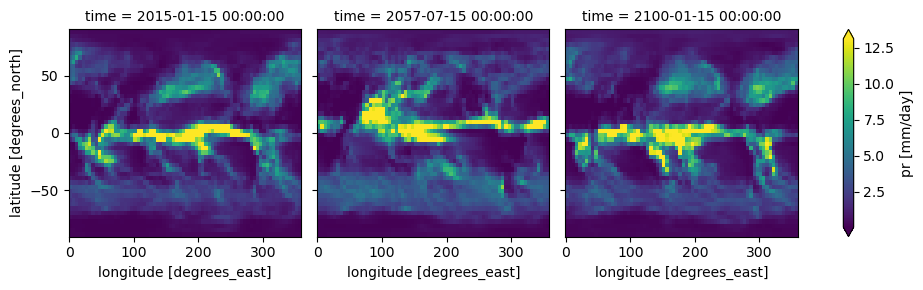

In [4]:
data_subset = data.isel(time=[0, data.time.size // 2, -1]).sel(ssp="ssp370", member_id=0)
data_subset.tas.plot(col="time", x="x", y="y", robust=True)
data_subset.pr.plot(col="time", x="x", y="y", robust=True)

# Plot the time series of global mean temperature and precipitation

Note that we do not plot the SSP245 scenario here, as it is corrupted in the provided data.

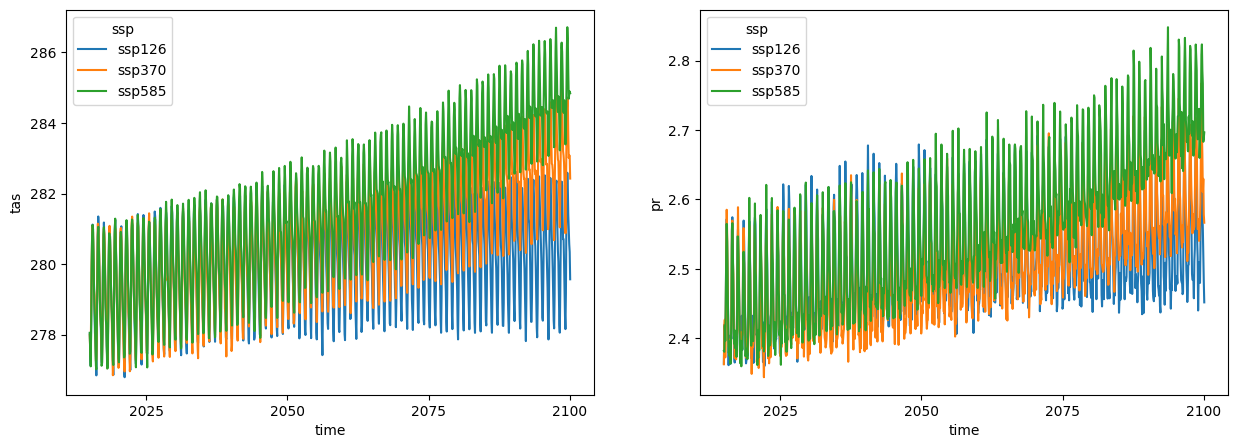

In [4]:
global_mean_data = data.sel(ssp=["ssp126", "ssp370", "ssp585"]).mean(dim=["x", "y", "member_id"])  # also average over all ensemble members
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
global_mean_data.tas.plot(label="Temperature", ax=ax[0], hue="ssp")
global_mean_data.pr.plot(label="Precipitation", ax=ax[1], hue="ssp")# Plot the time series of global mean temperature and precipitation

# Plot the (global mean) time series of climate forcings

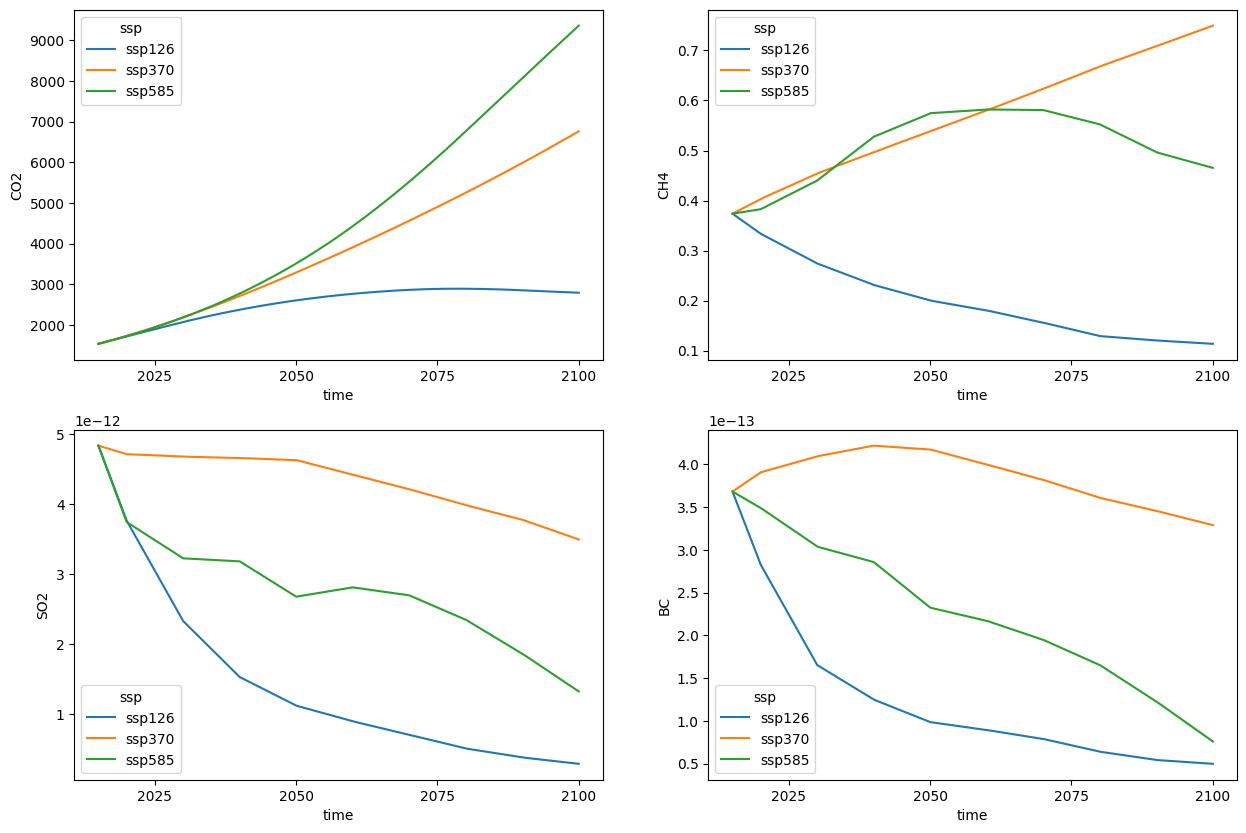

In [5]:
global_mean_data = data.sel(ssp=["ssp126", "ssp370", "ssp585"]).mean(dim=["longitude", "latitude", "member_id"]) 
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()
global_mean_data.CO2.plot(ax=axes[0], hue="ssp")
global_mean_data.CH4.plot(ax=axes[1], hue="ssp")
global_mean_data.SO2.plot(ax=axes[2], hue="ssp")
_ = global_mean_data.BC.plot(ax=axes[3], hue="ssp")